<h1>Introduction</h1>
<p>
    I will be looking at rock music from 1950-2020. I chose this dataset for two reasons:
    <h4>Personal Reasons:</h4>
    <ul>
        <li>I really love rock music and this is an opportunity to research this genre in depth</li>
        <li>Rock was created in the south by African Americans and expanded to the world, this makes it a foundation in American culture.</li>
    </ul>
    
   <h4>Business Objective:</h4>
       One of the main goals of companies like Spotify or Apple Music is to keep their customers on the app as much as possible. This is difficult if the recommendation system is not accurate. When we think of Rock music, we all know it's distinct sound, but when we talk about the subgenres, it becomes muddier. 
       
   For this project I hope to find patterns to better detect these subtle differences in subgenres, so that companies like Spotify and Apple Music can have longer user sessions lengths in their apps
    </ul>
</p>

In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Loading the Data</h2>

In [255]:
rock_df = pd.read_csv('history-of-rock-spotify - Copy.csv')

In [256]:
# took out variables that were either duplicates or unneccessary
rock_df.drop(columns=['index', 'danceability.1', 'name', 'artist', 'instrumentalness'], axis=1, inplace=True)

In [257]:
rock_df.head()

,release_date,length,popularity,danceability,acousticness,energy,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,1991,5.032000,74,0.502,0.000025,0.912,1,0.1060,-4.556,0.0564,116.761,4,0.720
1,1971,8.047167,78,0.338,0.580000,0.340,9,0.1160,-12.049,0.0339,82.433,4,0.197
2,1975,5.905333,74,0.392,0.288000,0.402,0,0.2430,-9.961,0.0536,143.883,4,0.228
3,1971,3.131100,77,0.547,0.907000,0.257,0,0.0935,-12.358,0.0252,75.752,4,0.169
4,1965,3.713550,77,0.723,0.038300,0.863,2,0.1280,-7.890,0.0338,136.302,4,0.931


<h2>Understanding the Data</h2>

In [258]:
rock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484 entries, 0 to 5483
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   release_date    5484 non-null   int64  
 1   length          5484 non-null   float64
 2   popularity      5484 non-null   int64  
 3   danceability    5484 non-null   float64
 4   acousticness    5484 non-null   float64
 5   energy          5484 non-null   float64
 6   key             5484 non-null   int64  
 7   liveness        5484 non-null   float64
 8   loudness        5484 non-null   float64
 9   speechiness     5484 non-null   float64
 10  tempo           5484 non-null   float64
 11  time_signature  5484 non-null   int64  
 12  valence         5484 non-null   float64
dtypes: float64(9), int64(4)
memory usage: 557.1 KB


Seems like all the data is numeric...let's take a closer look.

In [259]:
rock_df.describe()

,release_date,length,popularity,danceability,acousticness,energy,key,liveness,loudness,speechiness,tempo,time_signature,valence
count,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000
mean,1991.196389,4.148302,49.413202,0.511047,0.173019,0.715642,5.191284,0.202984,-8.007842,0.057867,125.317722,3.947119,0.556601
std,15.331628,1.496269,17.317263,0.147916,0.242596,0.204980,3.489761,0.176790,3.534529,0.047112,28.375444,0.290485,0.241503
min,1956.000000,0.162533,0.000000,0.000000,0.000001,0.003830,0.000000,0.012000,-32.909000,0.000000,0.000000,0.000000,0.000000
25%,1978.000000,3.302100,40.000000,0.413000,0.003658,0.584000,2.000000,0.091400,-10.083750,0.032800,104.362500,4.000000,0.367000
50%,1993.000000,3.945442,52.000000,0.515000,0.048400,0.758000,5.000000,0.132000,-7.408500,0.042100,123.885000,4.000000,0.561000
75%,2004.000000,4.680271,62.000000,0.611000,0.260250,0.885000,9.000000,0.269250,-5.308000,0.062900,142.731250,4.000000,0.750250
max,2020.000000,24.091767,84.000000,0.987000,0.995000,0.998000,11.000000,0.999000,1.949000,0.550000,217.913000,5.000000,0.990000


Most of the variables have values between 0 and 1. It may be appropriate to change time_signature and key to a categorica variable. Also, some of these continuous variables could be converted to categorical variables.

In [260]:
# the max in 'loudness' is over 1.9, which is very loud
rock_df[rock_df['loudness'] > 1.9]
# song: you gonna get it by Coachwhips

,release_date,length,popularity,danceability,acousticness,energy,key,liveness,loudness,speechiness,tempo,time_signature,valence
5461,2003,2.4371,32,0.335,0.00217,0.979,5,0.0988,1.949,0.0759,121.296,4,0.0376


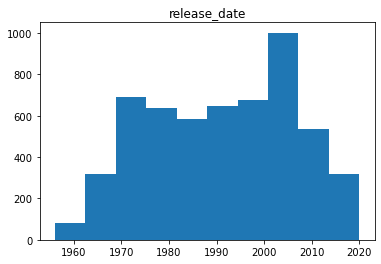

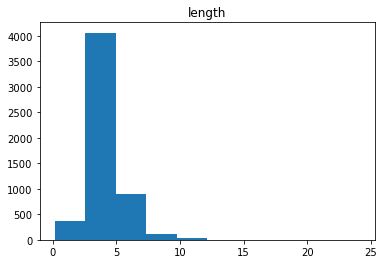

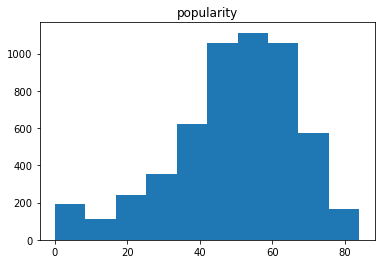

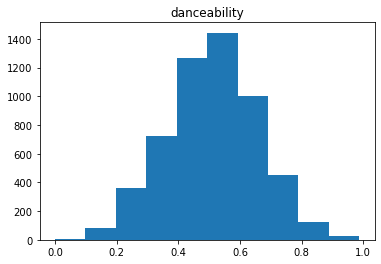

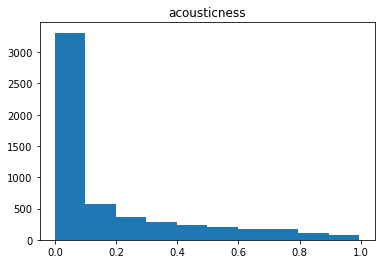

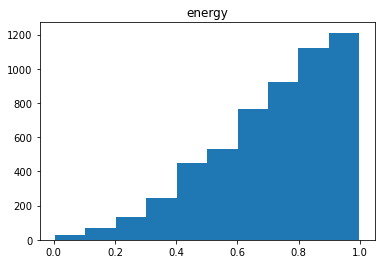

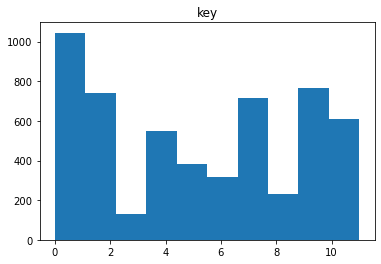

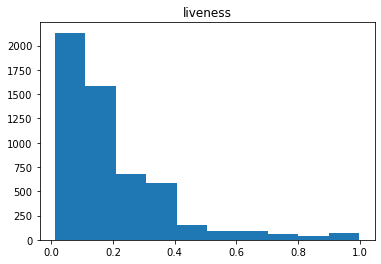

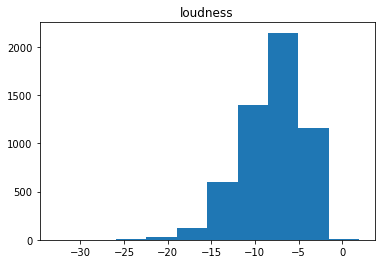

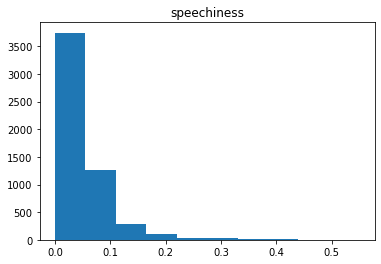

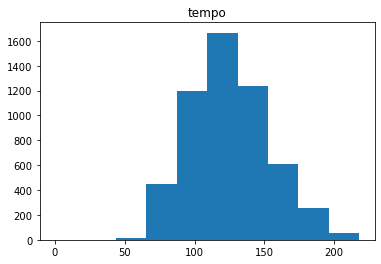

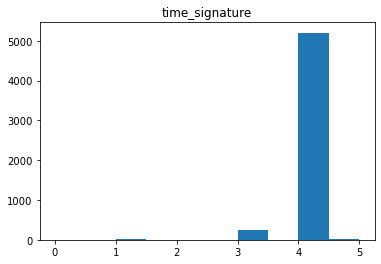

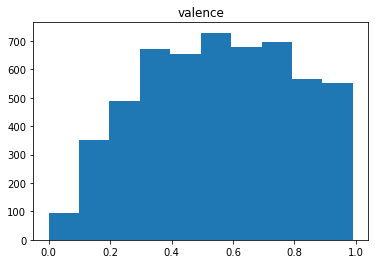

In [261]:
for i in rock_df.select_dtypes(include='number'):
    plt.hist(rock_df[i])
    plt.title(i)
    plt.show()

<h3>Categorizing Continuous Variables</h3>

In [262]:
def categorize_speech(speech):
    if speech >= 0.60:
        return 'spoken'
    elif speech >= 0.33 and speech < 0.60 :
        return 'music/spoken'
    elif speech < 0.33:
        return 'music'

rock_df['speech'] = rock_df['speechiness'].apply(categorize_speech)

print(rock_df.groupby("speech")["speechiness"].count())

speech
music           5456
music/spoken      28
Name: speechiness, dtype: int64


normalizing and scaling the data may help the non-normality

In [263]:
key_ = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
def categorize_key(keys):
    if keys==0:
        return key_[0]
    elif keys==1:
        return key_[1]
    elif keys==2:
        return key_[2]
    elif keys==3:
        return key_[3]
    elif keys==4:
        return key_[4]
    elif keys==5:
        return key_[5]
    elif keys==6:
        return key_[6]
    elif keys==7:
        return key_[7]
    elif keys==8:
        return key_[8]
    elif keys==9:
        return key_[9]
    elif keys==10:
        return key_[10]
    elif keys==11:
        return key_[11]
    else:
        return np.nan

rock_df['keys'] = rock_df['key'].apply(categorize_key)

print(rock_df.groupby("keys")["key"].count())

keys
A     765
A#    259
B     351
C     657
C#    388
D     739
D#    129
E     548
F     381
F#    319
G     715
G#    233
Name: key, dtype: int64


In [264]:
def categorize_live(live):
    if live >= 0.80:
        return 'live'
    else:
        return 'not live'
    
rock_df['live'] = rock_df['liveness'].apply(categorize_live)

print(rock_df.groupby("live")["liveness"].count())

live
live         116
not live    5368
Name: liveness, dtype: int64


I changed some of these variables into categoricals because it seemed appropriate based on the information I got from kaggle

In [265]:
rock_df['time_signature'] = rock_df['time_signature'].astype(object)
rock_df['release_date'] = rock_df['release_date'].astype(object)

<h3>Analyzing Transformed Data</h3>

In [266]:
rock_df.describe(include=['O'])

,release_date,time_signature,speech,keys,live
count,5484,5484,5484,5484,5484
unique,65,5,2,12,2
top,2003,4,music,A,not live
freq,173,5205,5456,765,5368


In [267]:
rock_df.describe()

,length,popularity,danceability,acousticness,energy,key,liveness,loudness,speechiness,tempo,valence
count,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000,5484.000000
mean,4.148302,49.413202,0.511047,0.173019,0.715642,5.191284,0.202984,-8.007842,0.057867,125.317722,0.556601
std,1.496269,17.317263,0.147916,0.242596,0.204980,3.489761,0.176790,3.534529,0.047112,28.375444,0.241503
min,0.162533,0.000000,0.000000,0.000001,0.003830,0.000000,0.012000,-32.909000,0.000000,0.000000,0.000000
25%,3.302100,40.000000,0.413000,0.003658,0.584000,2.000000,0.091400,-10.083750,0.032800,104.362500,0.367000
50%,3.945442,52.000000,0.515000,0.048400,0.758000,5.000000,0.132000,-7.408500,0.042100,123.885000,0.561000
75%,4.680271,62.000000,0.611000,0.260250,0.885000,9.000000,0.269250,-5.308000,0.062900,142.731250,0.750250
max,24.091767,84.000000,0.987000,0.995000,0.998000,11.000000,0.999000,1.949000,0.550000,217.913000,0.990000


Above is the new clean and transformed data. If we compare from before, we see that there are 4 object datatypes now. I categorized the live and speech variables and changed the time_signature variable into an object datatype. Finally for the keys variable, I changed the values corresponding to its key letter. For example 0=C, 1=C#......11=B, -1 means null according to the author who published the dataset in kaggle.

<h3>Finding Null Values</h3>

In [268]:
rock_df.isnull().sum().loc[lambda x: x>0]

Series([], dtype: int64)

temp and time_signature have one null value each, so I will drop these values

In [269]:
rock_df[['time_signature','tempo']] = rock_df[['time_signature', 'tempo']].replace(0, np.nan).dropna()

<h2>Visualizing the Data (EDA)</h2>

<h3>Continuous/Continuous</h3>

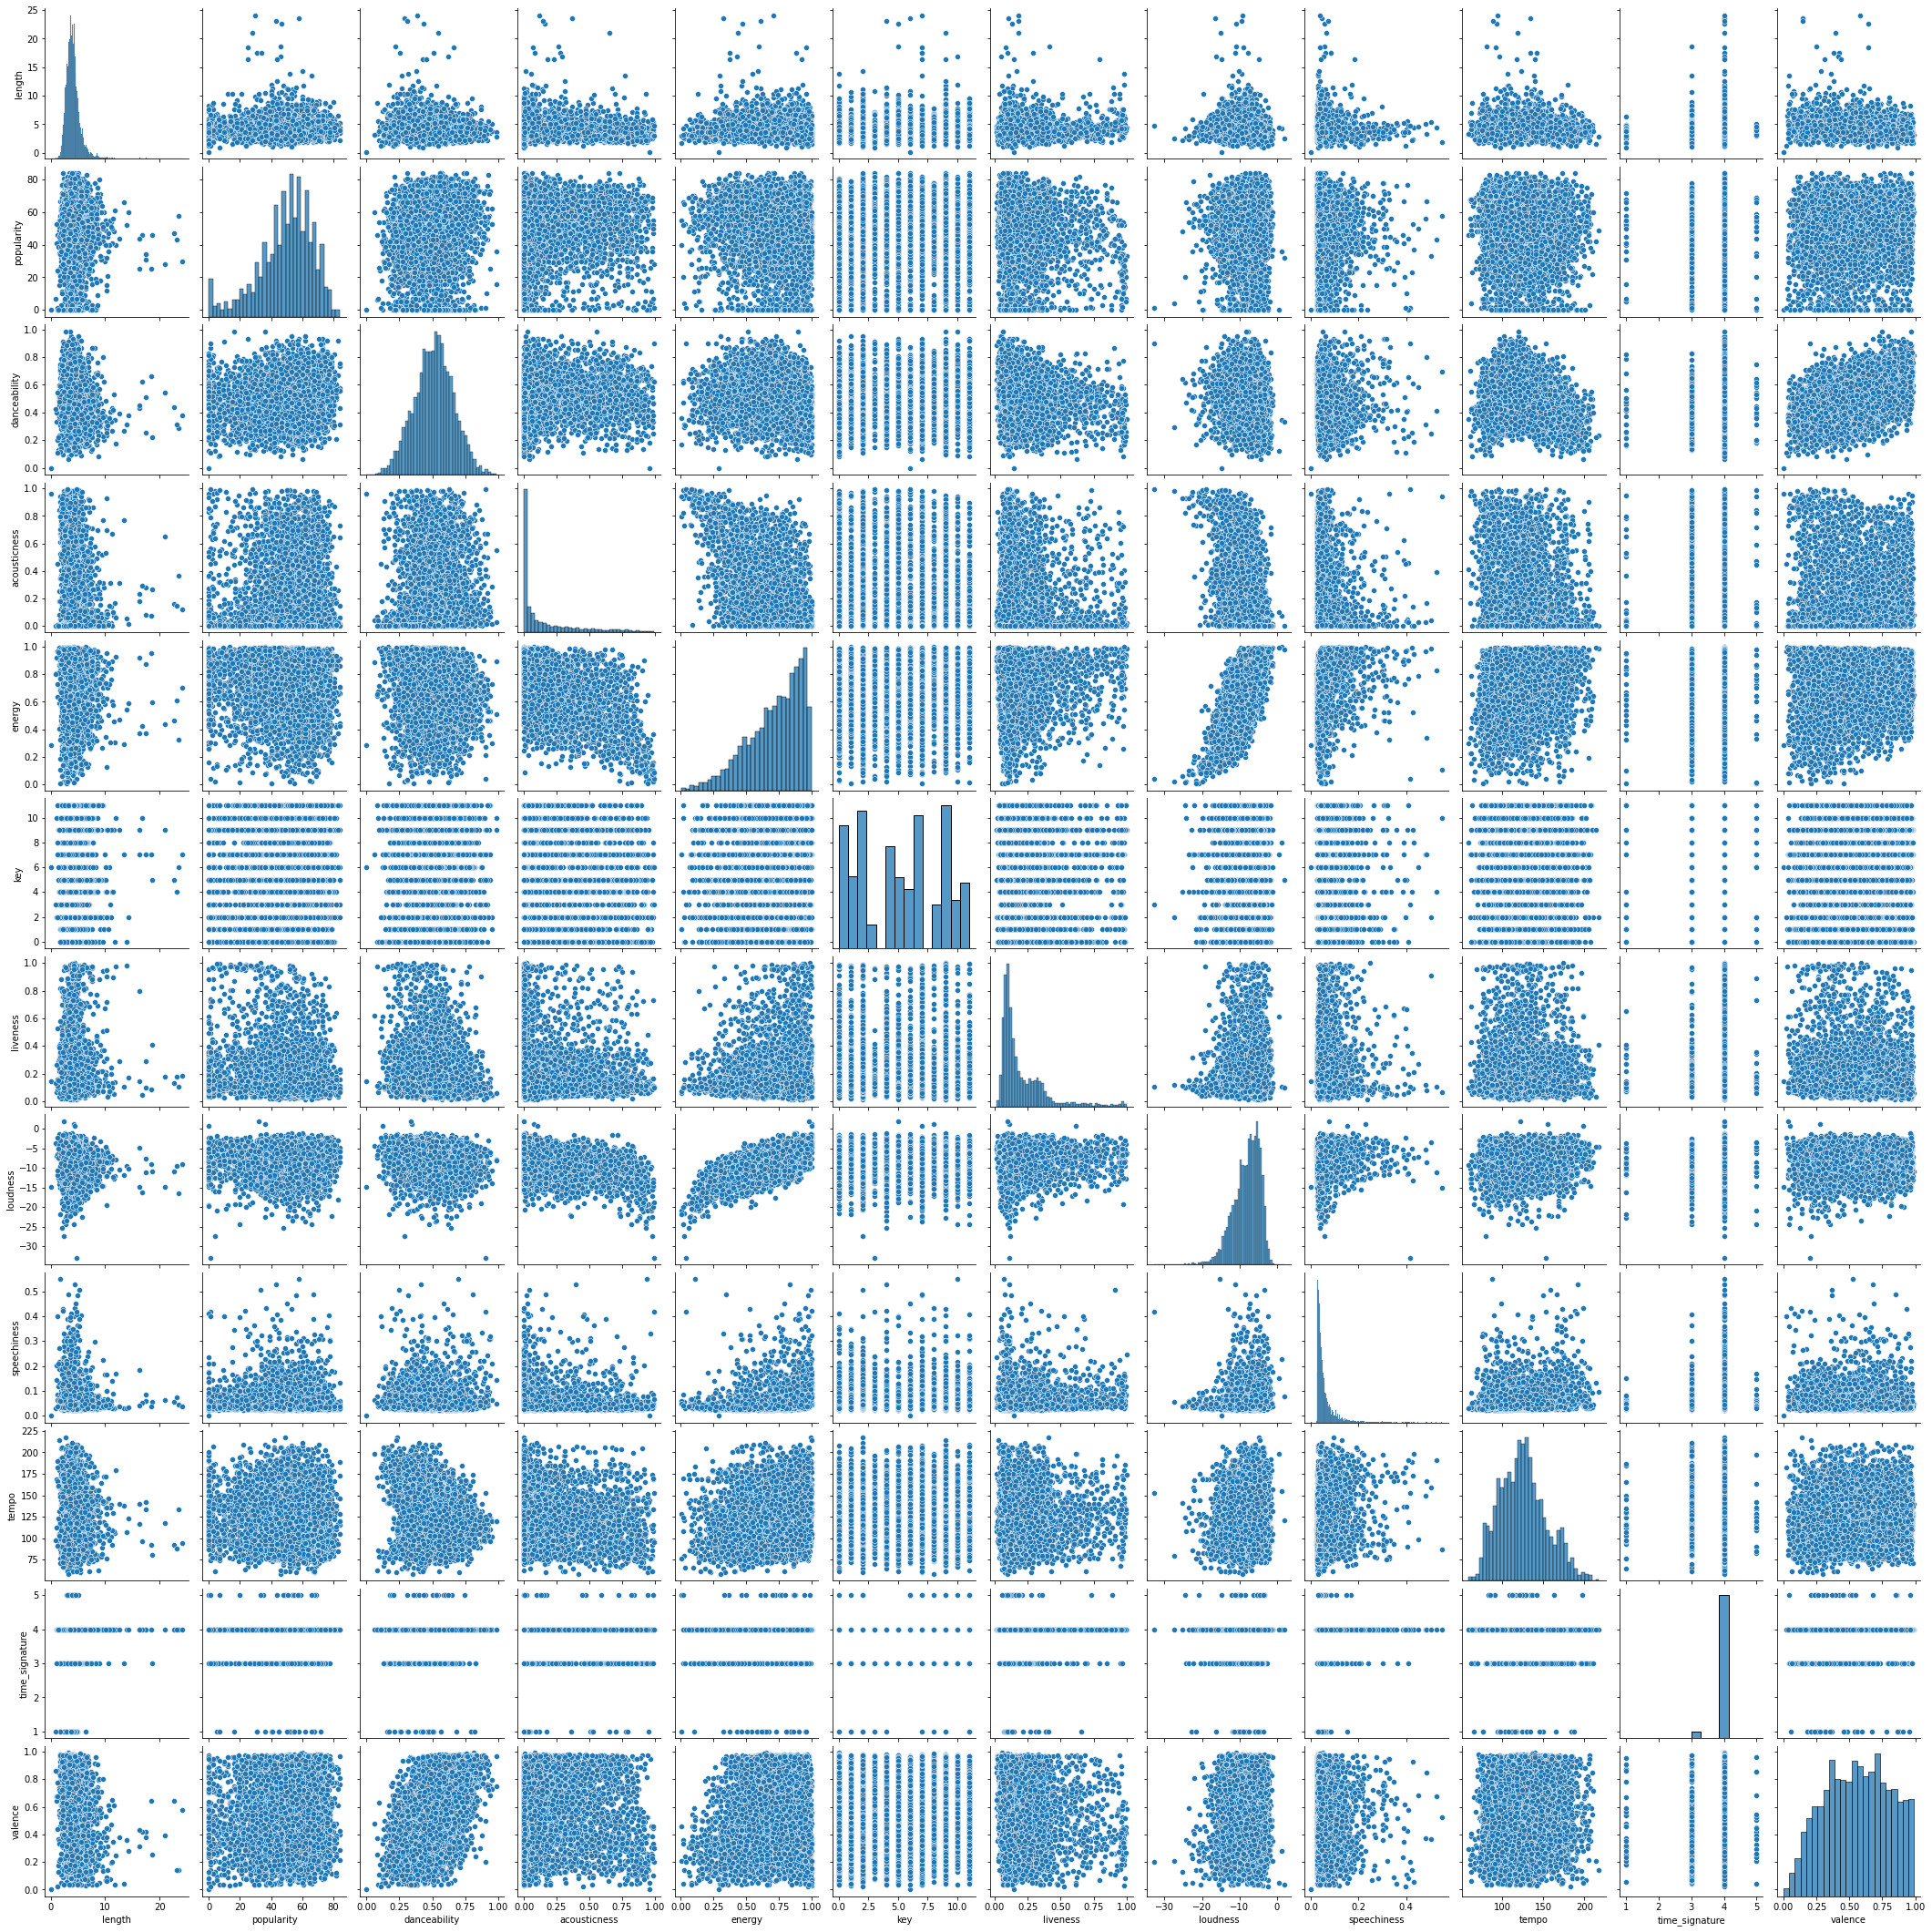

In [270]:
sns.pairplot(rock_df.select_dtypes(include='number'))

A lot of these histograms don't seem to be normalized so I need to do that before I get into the modeling portion.

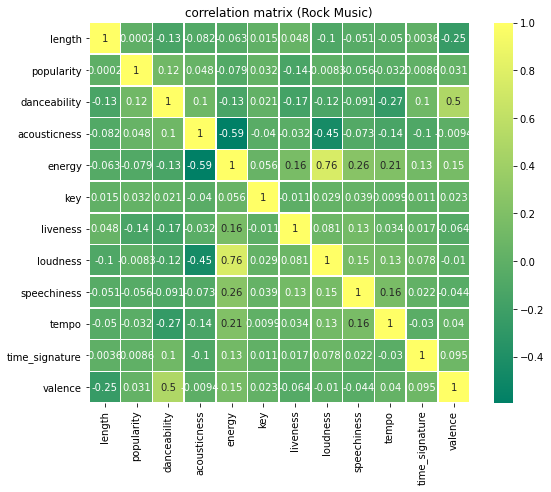

In [271]:
corrmat_rock = rock_df.corr()

plt.figure(figsize=(19,7))

plt.subplot(1,2,1)
sns.heatmap(corrmat_rock, square=True, annot=True, linewidths=.5, cmap="summer")
plt.title("correlation matrix (Rock Music)")
plt.show()

<h4>Postive Relationship</h4>
<ul>
    <li>energy v loudness</li>
    <li>danceability v valence(happy/sadness sound)</li>
    <li>release_date v loudness</li>
    <li>release_date v energy</li>
</ul>

<h4>Negative Relationships</h4>
<ul>
    <li>acoustiness v energy</li>
    <li>acousticness v loudness</li>
    <li>acousticness v release_date</li>
    <li>popularity v release_date</li>
</ul>

<em>release date, energy, acousticness, energy, and loudness have high correlation with other features</em>

<h3>Continuous/Categorical</h3>

In [272]:
rock_df.groupby("speech").mean()

,length,popularity,danceability,acousticness,energy,key,liveness,loudness,speechiness,tempo,time_signature,valence
speech,,,,,,,,,,,,
music,4.149603,49.468109,0.511409,0.172583,0.715446,5.192815,0.202521,-8.003181,0.056070,125.215252,3.947938,0.557192
music/spoken,3.894818,38.714286,0.440464,0.258074,0.753807,4.892857,0.293204,-8.916107,0.407929,149.756679,3.928571,0.441368


In [273]:
rock_df.groupby("live").mean()

,length,popularity,danceability,acousticness,energy,key,liveness,loudness,speechiness,tempo,time_signature,valence
live,,,,,,,,,,,,
live,5.092057,34.698276,0.410514,0.165814,0.825957,5.301724,0.919164,-7.688672,0.087336,128.381060,3.982759,0.439460
not live,4.127908,49.731185,0.513219,0.173175,0.713258,5.188897,0.187508,-8.014740,0.057230,125.274862,3.947084,0.559132


In [274]:
rock_df.groupby("keys").mean()

,length,popularity,danceability,acousticness,energy,key,liveness,loudness,speechiness,tempo,time_signature,valence
keys,,,,,,,,,,,,
A,4.205024,49.789542,0.511737,0.159890,0.730288,9.0,0.192768,-7.999348,0.057948,127.598271,3.956863,0.582139
A#,4.095564,49.988417,0.527227,0.191234,0.707934,10.0,0.188403,-8.095799,0.063982,124.336977,3.945946,0.555640
B,4.143464,50.717949,0.524348,0.123764,0.764323,11.0,0.201717,-7.529416,0.061425,124.962236,3.945869,0.556750
C,4.091092,48.494673,0.514557,0.189037,0.690697,0.0,0.209471,-8.324161,0.051642,125.014011,3.946728,0.565189
C#,4.006127,49.350515,0.497490,0.144269,0.745239,1.0,0.190599,-7.325095,0.062729,125.122884,3.932990,0.532863
D,4.183673,48.281461,0.507256,0.178411,0.706141,2.0,0.201173,-8.262668,0.056517,124.914870,3.948579,0.550060
D#,3.906852,49.155039,0.500403,0.243697,0.692253,3.0,0.160816,-7.899597,0.061455,127.213512,3.906977,0.500611
E,4.191909,49.919708,0.508208,0.174820,0.709197,4.0,0.222313,-8.238859,0.058551,126.137655,3.948905,0.558330
F,4.280087,50.677165,0.523173,0.230183,0.681788,5.0,0.205353,-8.266530,0.052294,122.872496,3.947507,0.559636


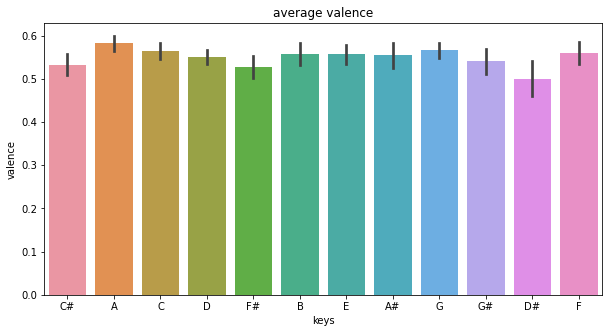

In [275]:
plt.figure(figsize=(10,5))

#plt.subplot(1,3,1)
sns.barplot(x=rock_df["keys"], y=rock_df["valence"])
plt.title("average valence")
plt.show()

For continuous/categorical, there doesn't seem to be much variance. However if we look at D#, it is lower and has higher variance. It may be interesting to research why it has such a lower valence. 

<h3>Categorical/Categorical</h3>

In [276]:
count_table = pd.crosstab(rock_df["keys"], rock_df["live"])
count_table

live,live,not live
keys,,
A,14,751
A#,5,254
B,6,345
C,11,646
C#,10,378
D,15,724
D#,3,126
E,10,538
F,6,375


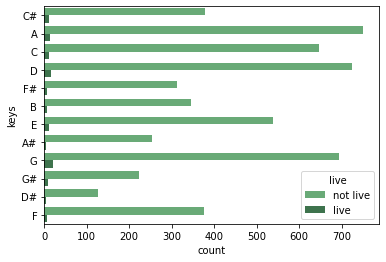

In [277]:
# Plot counts for each combination of levels.
sns.countplot(y="keys", hue="live", data=rock_df, palette="Greens_d")
plt.show()

In [278]:
count_table = pd.crosstab(rock_df["keys"], rock_df["speech"])
count_table

speech,music,music/spoken
keys,,
A,762,3
A#,258,1
B,350,1
C,653,4
C#,386,2
D,737,2
D#,128,1
E,544,4
F,378,3


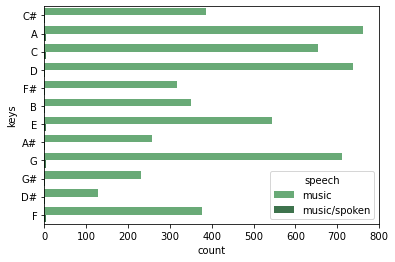

In [279]:
# Plot counts for each combination of levels.
sns.countplot(y="keys", hue="speech", data=rock_df, palette="Greens_d")
plt.show()

In [280]:
count_table = pd.crosstab(rock_df["live"], rock_df["speech"])
count_table

speech,music,music/spoken
live,,
live,115,1
not live,5341,27


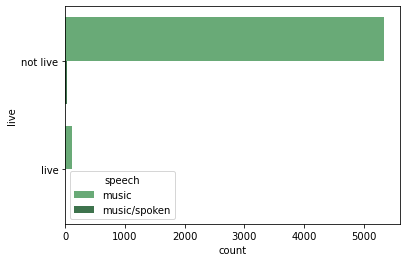

In [281]:
# Plot counts for each combination of levels.
sns.countplot(y="live", hue="speech", data=rock_df, palette="Greens_d")
plt.show()

In [282]:
#rock_df.describe(include=['O'])
rock_df.describe(include=["O"]).T.loc[lambda x: x["unique"] > 10]

,count,unique,top,freq
release_date,5484,65,2003,173
keys,5484,12,A,765


For categorical/categorical, the classes are very skewed to one (high class imbalance). Therefore looking at these graphs aren't very useful. Other types of graphs may be more suitable.

<h2>Model Prep</h2>

In [283]:
from gower import gower_matrix
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import datasets, metrics

<h3>Feature Transformations</h3>

In [284]:
# normalize the data
from scipy.stats import boxcox
rock_df['acousticness'],_ = boxcox(rock_df['acousticness'])
rock_df['energy'],_ = boxcox(rock_df['energy'])

In [285]:
#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# get numeric data
num_d = rock_df.select_dtypes(exclude=['object'])

# update the cols with their normalized values
rock_df[num_d.columns] = scaler.fit_transform(num_d)

<h3>Feature Selection</h3>

In [286]:
#select features with low correlation
def remove_correlated_features(dataset, threshold=0.50):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    print(f'Deleted {colname} from dataset.')
                    del dataset[colname]

    return dataset

rock_df = remove_correlated_features(rock_df)

Deleted loudness from dataset.
Deleted valence from dataset.


In [287]:
# drop these variables since I have similar ones but categorized
rock_df.drop(columns=['key', 'speechiness', 'liveness'], axis=1, inplace=True)

<h3>Handy Functions</h3>

In [288]:
def num_features_by_cluster(df, cluster_label):
    """
    Specific to this dataset.
    Compares averages of these numeric features between clusters.
    """

    aggs = {
        "popularity": ["count", "mean"],
        "length": "mean",
        "danceability": "mean",
        "acousticness": "mean",
        "energy": "mean",
        "tempo": "mean"
    }
    colnames = ['records', 'popularity', 'length', 'danceability', 'acousticness', 'energy', 'tempo']

    agg_summary = df.groupby(cluster_label).agg(aggs)
    agg_summary.columns = colnames
    return agg_summary.style.background_gradient()

In [289]:
def cat_table_by_cluster(df, cluster_label, cat_var):
    """
    Creates a pivot table, counting companies grouped by the categorical
    variable, for each cluster.
    """

    cat_table = df.pivot_table(
        index=cat_var,
        columns=cluster_label,
        values="time_signature",
        aggfunc="count",
    ).fillna(0)
    return cat_table.style.background_gradient()

<h3>Looking at the Data...again</h3>

In [290]:
rock_df['time_signature'] = rock_df['time_signature'].astype(object)
rock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484 entries, 0 to 5483
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   release_date    5484 non-null   object 
 1   length          5484 non-null   float64
 2   popularity      5484 non-null   float64
 3   danceability    5484 non-null   float64
 4   acousticness    5484 non-null   float64
 5   energy          5484 non-null   float64
 6   tempo           5483 non-null   float64
 7   time_signature  5483 non-null   object 
 8   speech          5484 non-null   object 
 9   keys            5484 non-null   object 
 10  live            5484 non-null   object 
dtypes: float64(6), object(5)
memory usage: 471.4+ KB


In [291]:
rock_df.head()

,release_date,length,popularity,danceability,acousticness,energy,tempo,time_signature,speech,keys,live
0,1991,0.590655,1.419915,-0.061167,-1.838140,1.040922,-0.302899,0.182668,music,C#,not live
1,1971,2.605962,1.650919,-1.170009,1.325684,-1.694308,-1.514835,0.182668,music,A,not live
2,1975,1.174382,1.419915,-0.804902,0.924513,-1.502458,0.654633,0.182668,music,C,not live
3,1971,-0.679888,1.593168,0.243089,1.604365,-1.908166,-1.750705,0.182668,music,C,not live
4,1965,-0.290584,1.593168,1.433066,-0.025377,0.725175,0.386989,0.182668,music,D,not live


In [292]:
# made negative infinity values into positive values
rock_df = rock_df.dropna().replace(-np.inf, np.inf)

<h2>Clustering Models: Mixed</h2>

<h2>FAMD</h2>

In [293]:
import prince
#rock_df = np.nan_to_num(rock_df))
model = prince.FAMD()
famd = model.fit(rock_df)
coordinates = famd.row_coordinates(rock_df)

No handles with labels found to put in legend.


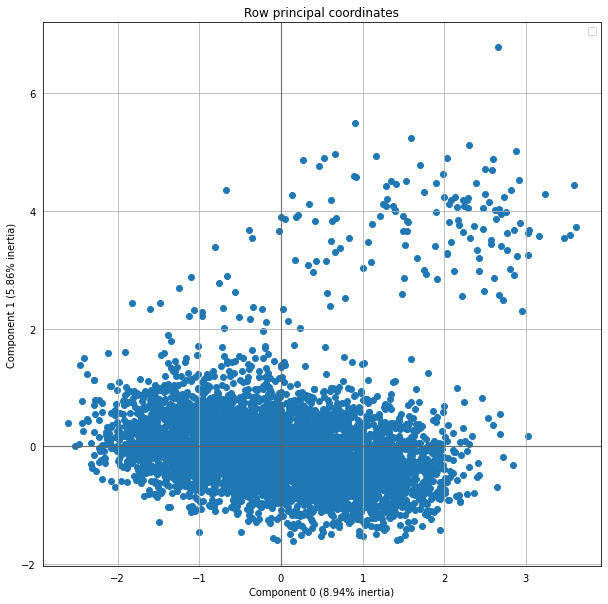

In [294]:
famd.plot_row_coordinates(
    X=rock_df,
    figsize=(10, 10),
    ellipse_outline=True,
    ellipse_fill=False
)
plt.show()

two blobs/clusters show up here with most of the data belonging to the bottom, dense cluster. 

<h3>Distance Matrix</h3>

In [295]:
dist_matrix = gower_matrix(rock_df)
dist_matrix = np.nan_to_num(dist_matrix)

In [296]:
len(dist_matrix)

5483

In [297]:
rock_df.shape

(5483, 11)

<h3>DBSCAN</h3>

In [298]:
dbscan = DBSCAN(eps=0.2, min_samples=3, metric="precomputed")
rock_df["DBSCAN"] = dbscan.fit_predict(dist_matrix)

In [299]:
rock_df['DBSCAN'].value_counts()

0    5483
Name: DBSCAN, dtype: int64

In [300]:
num_features_by_cluster(rock_df, "DBSCAN")

,records,popularity,length,danceability,acousticness,energy,tempo
DBSCAN,,,,,,,
0,5483,0.000520,0.000486,0.000630,-0.000299,0.000335,-0.000000


In [301]:
labels = dbscan.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

DBSCAN got only 1 cluster from this data

<h3>Agglomerative Clustering</h3>

In [302]:
aggl = AgglomerativeClustering(affinity="precomputed", n_clusters=3, linkage="average")
rock_df["Agglomerative"] = aggl.fit_predict(dist_matrix)

In [303]:
rock_df.drop(columns='DBSCAN',axis=1, inplace=True)

In [304]:
num_features_by_cluster(rock_df, "Agglomerative")

,records,popularity,length,danceability,acousticness,energy,tempo
Agglomerative,,,,,,,
0,116,-0.849803,0.630797,-0.679726,0.015264,0.581786,0.107343
1,25,-0.645265,-0.220354,-0.581511,0.427495,0.283370,0.994568
2,5342,0.022007,-0.012168,0.018128,-0.002639,-0.013616,-0.006985


In [305]:
cat_table_by_cluster(rock_df, "Agglomerative", "release_date")

Agglomerative,0,1,2
release_date,,,
1956,0.000000,0.000000,5.000000
1957,0.000000,0.000000,14.000000
1958,0.000000,0.000000,12.000000
1959,0.000000,0.000000,24.000000
1960,0.000000,0.000000,6.000000
1961,0.000000,0.000000,5.000000
1962,0.000000,0.000000,14.000000
1963,0.000000,0.000000,14.000000
1964,0.000000,0.000000,33.000000


In [306]:
cat_table_by_cluster(rock_df, "Agglomerative", "keys")

Agglomerative,0,1,2
keys,,,
A,14.000000,3.000000,748.000000
A#,5.000000,1.000000,253.000000
B,6.000000,1.000000,344.000000
C,11.000000,4.000000,642.000000
C#,10.000000,2.000000,376.000000
D,15.000000,1.000000,723.000000
D#,3.000000,1.000000,125.000000
E,10.000000,4.000000,534.000000
F,6.000000,3.000000,372.000000


In [307]:
print("The silhouette score of the agglomerative solution: {}"
      .format(metrics.silhouette_score(dist_matrix, rock_df['Agglomerative'], metric='euclidean')))

The silhouette score of the agglomerative solution: 0.4128933250904083


<h1>Summary:</h1>

<p>This dataset has 18 variables and 5464 observations. I removed variables that I deemed not important or duplicates and got back all numeric variables. Once I transformed all of my data I got back 5 categorical and 8 quantitive variables. If you want to check out what the variables mean, check out the kaggle page: https://www.kaggle.com/lukaszamora/history-of-rock-19502020. The only variable that I had to research more was the 'loudness' variable because of my limited understanding of the scale.

Once I got a dataset that was workable, I turned some of my variables into categorical variables ('live', 'speech'). For the 'key' variable I changed it to the corresponding scale (0=C, 1=C#, 2=D...etc), this was easier for me to analyze and work with.</p>


<h3>EDA</h3>
<h4>Continuous/Continous:</h4>
<p>Looking at the pairplot I noticed that many of my variables were not normalized. Also looking at the correlation map, some of my variables were highly correlated. I listed out which variables may be of concern once I modeled the data.</p>

<h4>Continuous/Categorical:</h4>
<p>There wasn't much difference in variance between any of the categorical v continuous variables. Most of the graphs looked similar. Valence was the most interesting to look at, because it did have some difference (in keys). </p>

<h4>Categorical/Categorical:</h4>
<p>Most of the categorical variables were highly imbalance to one value, this made plotting very difficult to analyze. I may need to change some of the threshold values to get more balanced values.
</p>

<h2>Modeling The Data:</h2>
<h3>FAMD</h3>
<p>In this model I got 2 clusters. Most of the data points were on the bottom cluster and the top cluster was very sparse, with few data points. This meaning that it couldn't really detect any difference in rock music, for the most part it's very hard to distinguish the subgenres</p>
    
<h3>DBSCAN</h3>
<p>In this model I only got 1 cluster. This is sort of similar to the FAMD, however, it didn't detect the sparsed cluster. This gives me same conclusion that subgenres are difficult to detect overall</p>
    
<h3>Agglomerative (Heirarchical)</h3> 
I generated 3 clusters from this model. Adding more would create overlapping clusters. Most of the data points went to cluster 2. These clusters do not necessarily represent any type of subgenre. 
<p>  
    <h6>Cluster 0</h6>
       <li>lengthy</li>
       <li>energetic</li>

   <h6>Cluster 1</h6>
       <li>acoustic</li>
       <li>slightly energetic</li>
       <li>fast tempo</li>


   <h6>Cluster 2</h6>
      <li>very popular</li>
      <li>danceable</li>
</p>

<p>
<h4>Clusters in Release Date</h4>
    <h6>Cluster 0:</h6>
    This type of rock music rose slightly in the 2000's. In 2020 it rose again.

   <h6>Cluster 0:</h6> 
    This type of rock music has had slight increase in prevalence throughout and again in 2019 and 2020.

   <h6>Cluster 2:</h6>
    This type of rock music has been most prevalent since the 1960's, though lost momentum in 2010's. 
</p>

<p>
<h4>Clusters in Keys</h4>
   <h4>Cluster 0:</h4>
   most common keys = G,D,A

   <h4>Cluster 1:</h4> 
   most common keys = C,E,G,F,A

   <h4>Cluster 2:</h4>
   most common keys = A,D,G,C,E
</p>




<h2>Best Model</h2>
<p>
    The best model is the agglomerative model (linkage='average') with a silhouette score of 0.41. This means that the clusters had some overlap but somewhat distinct. DBSCAN only produced one cluster (eps=0.2, min_pts=5) so it didn't have provide any new inforomation. FAMD produced two clusters though one was highly dense while the other cluster was sparse. However, the sparse cluster wasn't very clear, it might have been just outliers. 
</p>